In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# started with eda part

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

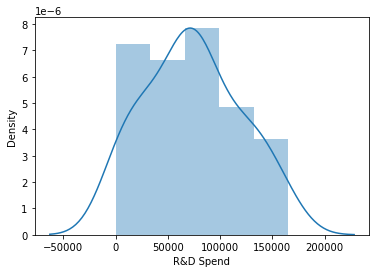

In [9]:
sns.distplot(data["R&D Spend"])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

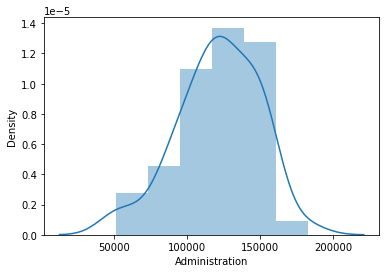

In [10]:
sns.distplot(data["Administration"])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

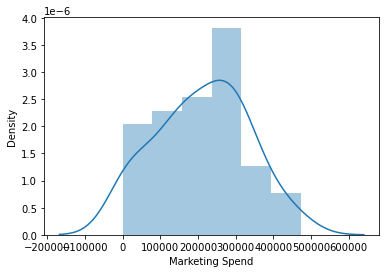

In [11]:
sns.distplot(data["Marketing Spend"])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

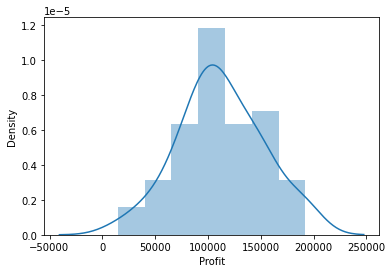

In [12]:
sns.distplot(data["Profit"])

In [13]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [14]:
data=data.rename({'R&D Spend':"rd",'Administration':'admin','Marketing Spend':'market_spend','State':'state','Profit':'profit'},axis=1)

In [15]:
data.head()

,rd,admin,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x225cac8b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x225cac8bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225cac8b520>],
 'medians': [<matplotlib.lines.Line2D at 0x225cac98370>],
 'fliers': [<matplotlib.lines.Line2D at 0x225cac98640>],
 'means': []}

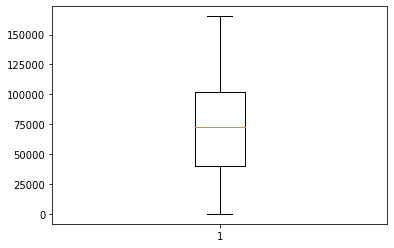

In [16]:
plt.boxplot(data.rd)

{'whiskers': [<matplotlib.lines.Line2D at 0x225cbccc070>,
 'caps': [<matplotlib.lines.Line2D at 0x225cbccc610>,
 'boxes': [<matplotlib.lines.Line2D at 0x225cbcbcd60>],
 'medians': [<matplotlib.lines.Line2D at 0x225cbcccbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225cbccce80>],
 'means': []}

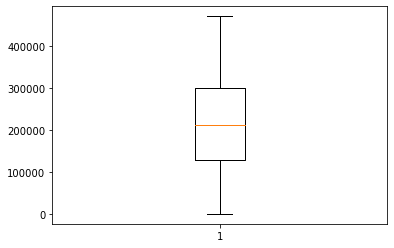

In [17]:
plt.boxplot(data.market_spend)

<AxesSubplot:xlabel='rd', ylabel='profit'>

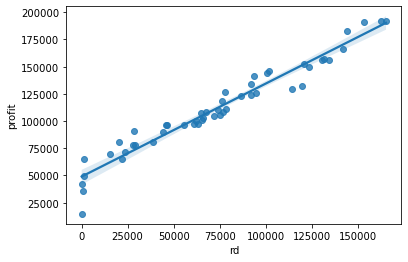

In [18]:
sns.regplot(data=data,x="rd",y="profit")

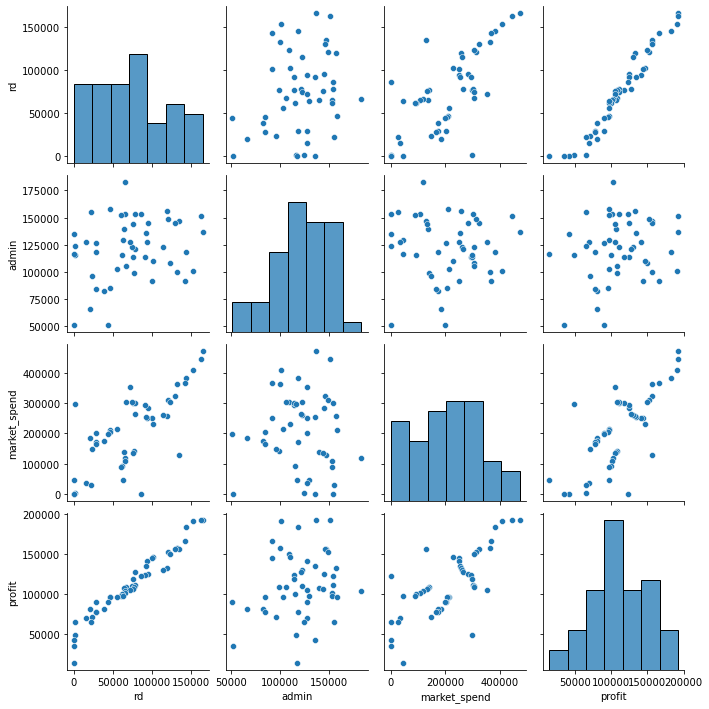

In [19]:
sns.pairplot(data=data )

In [20]:
data.corr()

,rd,admin,market_spend,profit
rd,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
market_spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


In [21]:
import statsmodels.formula.api as smf

In [22]:
model=smf.ols("profit~rd+market_spend+admin",data=data).fit()

In [23]:
model.params

Intercept       50122.192990
rd                  0.805715
market_spend        0.027228
admin              -0.026816
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        20:04:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd               0.8057      0.045     17.846      0.000       0.715       0.897
market_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
admin           -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model=smf.ols('profit~rd',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           3.50e-32
Time:                        20:04:24   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model1=smf.ols('profit~rd+market_spend+admin',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        20:04:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd               0.8057      0.045     17.846      0.000       0.715       0.897
market_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
admin           -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
model2=smf.ols('profit~rd+admin',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           7.29e-31
Time:                        20:04:25   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
rd             0.8621      0.030     28.589      0.000       0.801       0.923
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_rd=smf.ols("rd~market_spend+admin",data=data).fit().rsquared
vif_rd=(1/1-(model_rd))
model_market=smf.ols("market_spend~rd+admin",data=data).fit().rsquared
vif_market=(1/1-(model_market))
model_admin=smf.ols("admin~market_spend+rd",data=data).fit().rsquared
vif_admin=(1/1-(model_admin))
vif_rd,vif_market,vif_admin

(0.4050381775426064, 0.42977973147174975, 0.8509979176048247)

In [29]:
import statsmodels.api as sm

In [30]:
def get_standardize_value(vals):
    return (vals-vals.mean())/vals.std()

Text(0.5, 0, '')

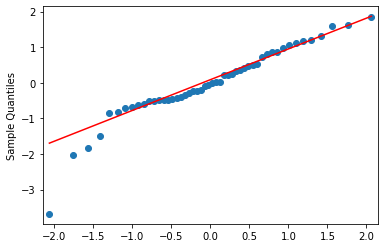

In [31]:
model_resid=get_standardize_value(model.resid)
qqplot=sm.qqplot(model_resid,line="q")
plt.xlabel("")

In [32]:
list(np.where(model_resid<(-2)))

[array([14, 49], dtype=int64)]

<AxesSubplot:>

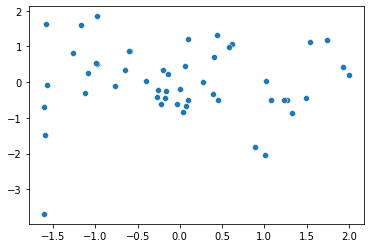

In [33]:
sns.scatterplot(x=get_standardize_value(model.fittedvalues),y=model_resid)

In [34]:
model_influ=model.get_influence()
(c,_)=model_influ.cooks_distance

<StemContainer object of 3 artists>

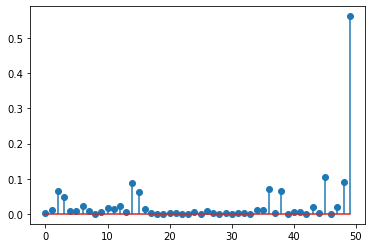

In [35]:
plt.stem(np.arange(len(data)),np.round(c,3))

In [36]:
data.iloc[[14,49]]

,rd,admin,market_spend,state,profit
14,119943.24,156547.42,256512.92,Florida,132602.65
49,0.00,116983.80,45173.06,California,14681.40


In [37]:
data=data.drop(index=[14,49])

In [38]:
data.reset_index(inplace=True)

In [39]:
model=smf.ols('profit~rd+market_spend',data=data).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     627.0
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.38e-33
Time:                        20:04:36   Log-Likelihood:                -493.67
No. Observations:                  48   AIC:                             993.3
Df Residuals:                      45   BIC:                             999.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.969e+04   2228.391     22.299      0.000    4.52e+04    5.42e+04
rd               0.7880      0.034     23.356      0.000       0.720       0.856
market_spend     0.0252      0.012      2.024      0.049       0.000       0.050
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.491
Skew:                           0.117   Prob(JB):                        0.782
Kurtosis:                       2.563   Cond. No.                     5.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_inf=model.get_influence()
(c,_)=model_inf.cooks_distance

<StemContainer object of 3 artists>

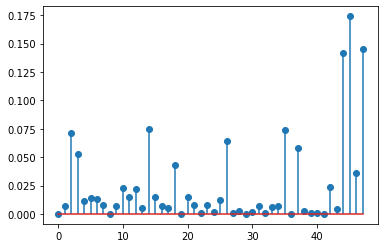

In [42]:
plt.stem(np.arange(len(data)),np.round(c,3)) # if the values are going above 1.0 then it shold be cocidering

In [43]:
influence_plot(model)

NameError: name 'influence_plot' is not defined

In [ ]:
# k = cars.shape[1]
# n = cars.shape[0]
# leverage_cutoff = 3*((k + 1)/n)
# leverage_cutoff

In [ ]:
model=smf.ols('profit~rd+market_spend',data=data).fit()

In [ ]:
model.summary()

In [ ]:
model.rsquared,model.rsquared_adj

In [ ]:
model.predict

In [ ]:
1/(1-0.950) #vif

In [ ]:
rsq=model.rsquared

In [ ]:
vif=1/(1-rsq)

In [ ]:
vif

In [ ]:
model.resid

In [ ]:
import statsmodels.api as sm

In [ ]:
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [ ]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
influence_plot(model)

In [ ]:
data[data.index.isin([46,49])]

In [ ]:
data=data.drop(data.index[[46,49]],axis=0)

In [ ]:
data.reset_index(drop=True) # reset the index

In [ ]:
data.columns

In [ ]:
model=smf.ols("profit~rd+market_spend",data=data).fit()

In [ ]:
model.params

In [ ]:
model.summary()

In [ ]:
data_influence=model.get_influence()
(c,_)=data_influence.cooks_distance

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
influence_plot(model)

In [ ]:
# get standardize to minimize the outlier or influencer

In [ ]:
def get_standardize_values(vals):
    return(vals-vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardize_values(model.fittedvalues),
           get_standardize_values(model.resid))

In [ ]:
data[data.index.isin([15,14,48,19])]

In [ ]:
data=data.drop(data.index[[15,14,19]],axis=0)

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
model=smf.ols("profit~rd+market_spend",data=data).fit()

In [ ]:
model.params

In [ ]:
model.summary()

In [ ]:
1/(1-0.95)

In [ ]:
vif=1/(1-0.969)

In [ ]:
vif

In [ ]:
data_influence=model.get_influence()
(c,_)=data_influence.cooks_distance

In [ ]:
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
influence_plot(model)

In [ ]:
data[data.index.isin([44,6])]

In [ ]:
data=data.drop(data.index[[44,6]],axis=0).reset_index(drop=True)

In [ ]:
model=smf.ols("profit~rd+market_spend",data=data).fit()

In [ ]:
model.params

In [ ]:
model.summary()

In [ ]:
new_data=pd.DataFrame({"rd":165349.20,"admin":136897.80,"market_spend":471784.10,"state":"california"},index=[1])
new_data

In [ ]:
model.predict(new_data)

In [ ]:
data.head()

In [ ]:
import joblib

In [ ]:
#joblib.dump(model,"50_Startup.pkl")